[Indice](index.ipynb) | Previo: [RelatividadEspecial.Electrodinamica.TensorFaraday](01.08.03.00.RelatividadEspecial.Electrodinamica.TensorFaraday.ipynb) | Siguiente: [RelatividadEspecial.ProblemasSeleccionados](01.09.00.00.RelatividadEspecial.ProblemasSeleccionados.ipynb)

### Ejemplos {ejemplos_electrodinamica}

No puede subestimarse el poder que tiene la formulación covariante de la electrodinámica que hemos desarrollado en esta sección.  En los ejemplos a continuación ilustramos la manera en la que se aplica lo que hemos visto para resolver algunas situaciones particulares que son de interés físico aunque no necesariamente son las más generales.

#### 1.16.10.1. Campo producido por una carga en movimiento
<a id='campo_carga_movimiento'></a>

Uno de los más interesantes ejemplos de aplicación de la electrodinámica manifiestamente covariante es el cálculo del campo electromagnético producido por una carga en movimiento rectilíneo y uniforme.

El cálculo de este campo usando la electrodinámica clásica es realmente laborioso.  Sin embargo si usamos los resultados vistos en esta sección el cálculo resulta bastante directo.

El truco consiste siempre en describir el problema en un sistema de referencia en el que el cálculo del campo sea realmente sencillo.  En este caso el sistema de referencia es aquel que se mueve con la misma velocidad de la partícula.  En este sistema de referencia esta probado no hay campo magnético producido por la carga y solo hay un campo eléctrico que viene dado por:

$$
\vec E' = \frac{q}{r'^3}\vec{r}'
$$
donde $\vec r'=\Delta x' \hat{e}_x + \Delta y' \hat{e}_y + \Delta z' \hat{e}_z$.

Según las reglas de transformación el campo en el sistema de referencia del observador quedaría:

$$
\begin{array}{rcl}
\vec E & = &  \vec E'+(\gamma-1) \vec E'_\perp\\
\vec B & = &  \gamma \vec u_L \times \vec E'\\
\end{array}
$$

Teniendo en cuenta que $\vec E'-\vec E'_\perp = \vec E'_\parallel$ y que $\vec u_L\times \vec E'=\vec u_L\times \vec E'_\perp$, el resultado se puede escribir como:

$$
\begin{array}{rcl}
\vec E & = &  \vec E'_\parallel+\gamma \vec E'_\perp\\
\vec B & = &  \vec u_L \times \vec E\\
\end{array}
$$

Aquí notamos un interesante efecto: el campo eléctrico en dirección del movimiento no se modifica, pero si lo hace en dirección perpendicular donde es incrementado por un factor $\gamma$. 

Ahora bien, el valor del campo dado por la ley de Coulomb tiene una modificación debido a la contracción de longitudes en dirección de propagación.  Si fijamos el eje x en la dirección de la velocidad, entonces:

$$
\vec r' = \gamma \Delta x \hat{e}_x + \Delta y \hat{e}_y + \Delta z \hat{e}_z
$$
de donde:

$$
r'^2 = \gamma \Delta x^2 + \Delta y^2 + \Delta z^2
$$
que se puede escribir como:

$$
r'^2 = \gamma^2 r^2 (1-v_L^2 \sin^2\theta)
$$
donde $\sin\theta=\sqrt{\Delta y^2+\Delta z^2}/\Delta x$ es el ángulo entre la dirección al punto en la que se esta calculando el campo y la dirección e propagación.  Este resultado es general independientemente de si se usa o no la configuración estándar.

Con este resultado el campo eléctrico en el sistema de referencia del observaor se puede escribir como:

$$
\vec E=\frac{1}{\gamma^2 (1-v_L^2\sin^2\theta)^{3/2}}\frac{q}{r^3}\vec{r}
$$

El campo magnético por otro lado esta dado por:

$$
\vec B=\frac{1}{\gamma^2 (1-v_L^2\sin^2\theta)^{3/2}}\frac{q}{r^3}\vec{v}_L\times \vec{r}
$$

Como vemos en cada momento ambos campos siguen disminuyendo como $1/r^2$, pero su magnitud depende de la dirección en la que mida el campo respecto a su dirección de propragación.

Cuando $\theta=0, \pi$ (en la dirección de movimiento o en dirección contraria) la magnitud del campo eléctrico es:

$$
E(\theta=0,\pi)=\frac{q}{(\gamma r)^2}
$$

Es decir, en dirección del campo la contracción de longitudes hace que en el sistema de referencia del observador el campo a una distancia $r$ dada tenga una intensidad equivalente a la que vería la carga a una distancia $\gamma r$.

En dirección perpendicular al campo $\theta=\pm\pi/2$ el campo por otro lado es:

$$
E(\theta=\pm\pi/2)=\frac{(\gamma q)}{r^2}
$$

En dirección perpendicular el efecto es curioso.  En este caso es como si el campo fuera producido por una carga más intensa (carga relativista) $q_r=\gamma q$.  En realidad el efecto es debido a los efectos en el espacio-tiempo en los que el campo magnético que ahora esta presente juega también un papel importante.

En síntesis a la misma distancia hacia adelante el campo es $\gamma^3$ más débil que en dirección perpendicular.

Podemos visualizar este campo de dos maneras diferentes, por un lado mostrando el vector de campo a una distancia determinada.

Fijemos las propiedades de la partícula.

In [1]:
q=1
vL=0.7
gamma=1/(1-vL**2)**0.5

Calculamos las componentes del campo eléctrico (tanto en reposo como en movimiento) a una distancia constante:

In [7]:
#Angulos en los que evaluaremos el campo
from numpy import linspace,concatenate,pi,zeros_like
tetas=concatenate((linspace(-pi,0,10),
                   linspace(0,pi,10)))

#Vector de posición
xs=zeros_like(tetas)
ys=zeros_like(tetas)

#Vector de campo eléctrico
from numpy import zeros_like
Exs=zeros_like(tetas)
Eys=zeros_like(tetas)

Erxs=zeros_like(tetas)
Erys=zeros_like(tetas)

#Distancia constante
r=0.3
from numpy import cos,sin
for i,teta in enumerate(tetas):
    xs[i]=r*cos(teta)
    ys[i]=r*sin(teta)
    # Campo eléctrico en reposo
    Erxs[i]=q/r**3*xs[i]
    Erys[i]=q/r**3*ys[i]    
    # Campo eléctrico en movimiento
    Exs[i]=q/(r**3*gamma**2*(1-vL**2*sin(teta)**2)**1.5)*xs[i]
    Eys[i]=q/(r**3*gamma**2*(1-vL**2*sin(teta)**2)**1.5)*ys[i]

Ahora podemos graficar el campo:

In [8]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


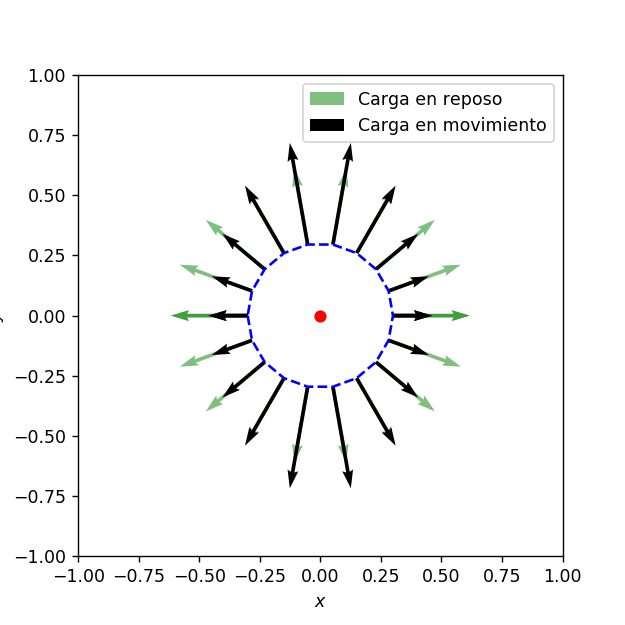

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Gráfico de los puntos 
ax.plot(xs,ys,'b--')
#Gráfico de los vectores de campo
ax.quiver(xs,ys,Erxs,Erys,
          color='g',alpha=0.5,scale=70,
          label="Carga en reposo")
ax.quiver(xs,ys,Exs,Eys,
          scale=70,
          label="Carga en movimiento")
#Posición de la carga
ax.plot([0],[0],'ro')

#Decoración
ax.legend();
ax.set_xlim((-1,1));
ax.set_ylim((-1,1));
ax.set_xlabel("$x$");
ax.set_ylabel("$y$");

<a id='fig:01.08.04.00.RelatividadEspecial.Electrodinamica.Ejemplos_23'></a><center><b>Figura 1.23.</b> </center>

#### 1.16.10.2. Campo producido por un alambre recto
<a id='campo_alambre'></a>

[Indice](index.ipynb) | Previo: [RelatividadEspecial.Electrodinamica.TensorFaraday](01.08.03.00.RelatividadEspecial.Electrodinamica.TensorFaraday.ipynb) | Siguiente: [RelatividadEspecial.ProblemasSeleccionados](01.09.00.00.RelatividadEspecial.ProblemasSeleccionados.ipynb)